## Step 1. Gathering Data

In [1]:
import pandas as pd
import requests
import json
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#The Twitter archive - downloaded and uploaded this file into a dataframe
df_twitter=pd.read_csv('twitter-archive-enhanced.csv')


#The tweet image predictions - downloaded this file from the provided URL using the Requests library and read 
#into a dataframe
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)
    
df_image = pd.read_csv('image-predictions.tsv',sep='\t')


#API tweet data - read tweet_json.txt file line by line into a dataframe
tweet_list=[]
with open('tweet-json.txt','r') as f:
    for line in f:
        data=json.loads(line)
        tweet_list.append({"tweet_id" : data["id"],
                           "retweet_count" : data["retweet_count"],
                           "favorite_count" : data["favorite_count"]})

df_tweet = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

## Step 2. Assessing Data

Visual assessment - check data with visual inspection and external source (Google Sheets). Programmatic assessment - check data with Pandas functions

In [3]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [4]:
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
df_twitter.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [6]:
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', 800)
df_twitter.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1391,700143752053182464,NaN,NaN,2016-02-18 02:24:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When it's Janet from accounting's birthday but you can't eat the cake cuz it's chocolate. 10/10 hang in there pupper https://t.co/Fbdr5orUrJ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700143752053182464/photo/1,10,10,None,None,None,pupper,None
312,835264098648616962,NaN,NaN,2017-02-24 23:04:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Lola. Her hobbies include being precious af and using her foot as a toothbrush. 12/10 Lola requests your help\n\nhttps://t.co/FYFyHh7rir https://t.co/IiB7ggduoU,NaN,NaN,NaN,"https://www.gofundme.com/lolas-life-saving-surgery-funds,https://twitter.com/dog_rates/status/835264098648616962/photo/1,https://twitter.com/dog_rates/status/835264098648616962/photo/1",12,10,Lola,None,None,None,None
1777,677918531514703872,NaN,NaN,2015-12-18 18:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Everything looks pretty good in there. Make sure to brush your gums. Been flossing? How's school going?"" Both 10/10 https://t.co/lWL2IMJqLR",NaN,NaN,NaN,https://twitter.com/dog_rates/status/677918531514703872/photo/1,10,10,None,None,None,None,None
2162,669393256313184256,NaN,NaN,2015-11-25 05:52:43 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Ronduh. She's a Finnish Checkered Blitzkrieg. Ears look fake. Shoes on point. 10/10 would pet extra well https://t.co/juktj5qiaD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669393256313184256/photo/1,10,10,Ronduh,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None


In [7]:
df_twitter.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [8]:
df_twitter.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [9]:
df_twitter[df_twitter['in_reply_to_status_id'].notnull()].count()

tweet_id                      78
in_reply_to_status_id         78
in_reply_to_user_id           78
timestamp                     78
source                        78
text                          78
retweeted_status_id            0
retweeted_status_user_id       0
retweeted_status_timestamp     0
expanded_urls                 23
rating_numerator              78
rating_denominator            78
name                          78
doggo                         78
floofer                       78
pupper                        78
puppo                         78
dtype: int64

In [10]:
df_twitter.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [11]:
df_twitter.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [12]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
df_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1863,842846295480000512,https://pbs.twimg.com/media/C7JkO0rX0AErh7X.jpg,1,Labrador_retriever,0.461076,True,golden_retriever,0.154946,True,Chihuahua,0.110249,True
426,674082852460433408,https://pbs.twimg.com/media/CVrSxy7WsAAFD2F.jpg,1,Pomeranian,0.666957,True,Shetland_sheepdog,0.028019,True,ski_mask,0.020683,False
1625,803773340896923648,https://pbs.twimg.com/media/CyeTku-XcAALkBd.jpg,2,miniature_pinscher,0.817066,True,redbone,0.059707,True,Irish_terrier,0.034195,True
1970,868880397819494401,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
1011,709449600415961088,https://pbs.twimg.com/media/Cdh4pgAW0AEKJ_a.jpg,2,Maltese_dog,0.780187,True,Dandie_Dinmont,0.074429,True,Norfolk_terrier,0.033776,True


In [15]:
df_image['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [16]:
df_image['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

In [17]:
df_image[(df_image['p1_dog']==False) & (df_image['p2_dog']==False) & (df_image['p3_dog']==False)].count()

tweet_id    324
jpg_url     324
img_num     324
p1          324
p1_conf     324
p1_dog      324
p2          324
p2_conf     324
p2_dog      324
p3          324
p3_conf     324
p3_dog      324
dtype: int64

In [18]:
df_image[(df_image['p1_dog']==False) & (df_image['p2_dog']==False) & (df_image['p3_dog']==False)].sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1211,742528092657332225,https://pbs.twimg.com/media/Ck39W0JWUAApgnH.jpg,2,sunglasses,0.900864,False,sunglass,0.040291,False,snorkel,0.009333,False
226,670361874861563904,https://pbs.twimg.com/media/CU2akCQWsAIbaOV.jpg,1,platypus,0.974075,False,spotted_salamander,0.011068,False,bison,0.003897,False
1902,851861385021730816,https://pbs.twimg.com/media/C8W6sY_W0AEmttW.jpg,1,pencil_box,0.662183,False,purse,0.066505,False,pillow,0.044725,False


In [19]:
#The API Tweet data
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [20]:
df_tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [21]:
df_tweet.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Quality
Twitter archive table
- some rows have values for in_reply_to_us, which means those tweets are replies to other tweets. Not the original tweets the project required.
- some retweeted_status_id rows have values, those are actually retweets. 
- timestamp is object datatype, not the correct datetime datatype.
- delete columns that will not be used for analysis.
- Text field is a mix of strings and hyperlinks that should be split.
- Besides expected value of 10, rating_denominator has a range of other values such as 0, 11, 20, 50, 80 etc.
- Name column has missing values (745 'None')
- Lowercase in Name column
- Dog stages columns:doggo, floofer, pupper, puppo are filled with None for missing values.

Tweet image prediction table
- p1, p2, and p3 columns have a mix of uppercase and lowercase

### Tidiness
Twitter archive table
-  doggo, floofer, pupper, puppo columns are all indicators of what stage of a dog is at. 

Tweet image prediction table
- confident prediction columns p1_conf, p2_conf, p3_conf are related to individual tweet_ids, only the highest one is required to determine the dog type.

## Step 3. Cleaning Data

In [22]:
df_twitter_clean=df_twitter.copy()
df_image_clean=df_image.copy()
df_tweet_clean=df_tweet.copy()

### Incorrect datatype

#### `Twitter archive`: timestamp is object datatype, not datetime type.

##### Define
Change the timestamp column to datetime datatype.

##### Code

In [23]:
df_twitter_clean['timestamp'] = df_twitter_clean['timestamp'].astype('datetime64[ns]')

##### Test

In [24]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

### Delete columns that will not be used for analysis

#### `Twitter archive`: break timestamp into components for analysis.

##### Define
Break timestamp column into time components, then delete column that is not required.

##### Code

In [25]:
df_twitter_clean['year']=df_twitter_clean['timestamp'].dt.year
df_twitter_clean['month']=df_twitter_clean['timestamp'].dt.month
df_twitter_clean['day']=df_twitter_clean['timestamp'].dt.day
df_twitter_clean.drop('timestamp',axis=1,inplace=True)

##### Test

In [26]:
df_twitter_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'source',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'year', 'month', 'day'],
      dtype='object')

### Lower case 

#### `Twitter archive`: lower case in Name column

##### Define
Change the first character in the values of the Name column from lower to upper case.

##### Code

In [27]:
df_twitter_clean['name']=df_twitter_clean['name'].str.capitalize()

##### Test

In [28]:
df_twitter_clean.name.str.istitle().value_counts()

True    2356
Name: name, dtype: int64

#### `Tweet image prediction`: lower case in P1, P2, P3 columns

##### Define
Change the first character in the values of the P1, P2, P3 columns from lower to upper case.

In [29]:
df_image_clean['p1']=df_image_clean['p1'].str.title()
df_image_clean['p2']=df_image_clean['p2'].str.title()
df_image_clean['p3']=df_image_clean['p3'].str.title()

In [11]:
df_image_clean['p2'].value_counts()

Labrador_Retriever    104
Golden_Retriever       92
Cardigan               74
Chihuahua              44
Pomeranian             42
                     ... 
Horse_Cart              1
Tray                    1
Pier                    1
Red_Fox                 1
Bagel                   1
Name: p2, Length: 404, dtype: int64

In [30]:
df_image_clean['p1'].value_counts()

Golden_Retriever      150
Labrador_Retriever    100
Pembroke               89
Chihuahua              83
Pug                    57
                     ... 
Pillow                  1
Carousel                1
Bald_Eagle              1
Lorikeet                1
Orange                  1
Name: p1, Length: 378, dtype: int64

### Missing values

#### `Twitter archive`: missing values in the Name column

##### Define
Change the missing values 'None' to blank in the Name column.

##### Code

In [31]:
df_twitter_clean.loc[df_twitter_clean['name']=='None','name'] = ''

##### Test

In [32]:
df_twitter_clean.name.str.isspace().value_counts()

False    2356
Name: name, dtype: int64

#### `Twitter archive`: missing values in the dog stages  columns

##### Define
Change the missing values 'None' to blank in the doggo, floofer, pupper, puppo columns.

##### Code

In [33]:
df_twitter_clean.loc[df_twitter_clean['doggo']=='None','doggo'] = ''
df_twitter_clean.loc[df_twitter_clean['floofer']=='None','floofer'] = ''
df_twitter_clean.loc[df_twitter_clean['pupper']=='None','pupper'] = ''
df_twitter_clean.loc[df_twitter_clean['puppo']=='None','puppo'] = ''

##### Test

In [34]:
df_twitter_clean['doggo'].value_counts()

         2259
doggo      97
Name: doggo, dtype: int64

In [35]:
df_twitter_clean['floofer'].value_counts()

           2346
floofer      10
Name: floofer, dtype: int64

In [36]:
df_twitter_clean['pupper'].value_counts()

          2099
pupper     257
Name: pupper, dtype: int64

In [37]:
df_twitter_clean['puppo'].value_counts()

         2326
puppo      30
Name: puppo, dtype: int64

### Unexpected values

#### `Twitter archive`: unexpected values in the Rating_denominator column

##### Define
rating_denominator has a range of incorrect values such as 0, 11, 20, 50, 80 etc. The expected value is 10.

##### Code

In [38]:
df_twitter_clean.loc[df_twitter_clean['rating_denominator'] !=10,'rating_denominator'] = 10

##### Test

In [39]:
df_twitter_clean['rating_denominator'].value_counts()

10    2356
Name: rating_denominator, dtype: int64

### Remove retweets

#### `Twitter archive`: removed retweets from archive when Retweeted_status_id have values

##### Define
When retweeted_status_id rows have values, those are actually retweets. If included, they may skew the final analysis.

##### Code

In [40]:
df_twitter_clean=df_twitter_clean[df_twitter_clean['retweeted_status_id'].isnull()]

##### Test

In [41]:
df_twitter_clean['retweeted_status_id'].notnull().sum()

0

### Filter out replies

#### `Twitter archive`: filter out those replies from archive when in_reply_to_status_id have values

##### Define
When in_reply_to_status_id have values, they are replied tweets instead of original ones. 

##### Code

In [42]:
df_twitter_clean=df_twitter_clean[df_twitter_clean['in_reply_to_status_id'].isnull()]

##### Test

In [43]:
df_twitter_clean['in_reply_to_status_id'].notnull().sum()

0

### Split links from text 

#### `Twitter archive`: Text field is a mix of strings and hyperlinks.

##### Define
Split links from text column and save in two separate columns

##### Code

In [44]:
# new data frame with split value columns
new = df_twitter_clean["text"].str.split(" http", n = 1, expand = True)
 
# making separate text_1 column from new data frame
df_twitter_clean["text_1"]= new[0]
 
# making separate text_url column from new data frame
df_twitter_clean["text_url"]= 'http' + new[1]
 
# Dropping old text column
df_twitter_clean.drop(columns =["text"], inplace = True)

##### Test

In [45]:
df_twitter_clean["text_url"].sample(5)

698     https://t.co/TVXpEJB7Wn
1710    https://t.co/YNWU7LeFgg
445     https://t.co/ii5eNX5LJT
985     https://t.co/cRTJiQQk9o
1373    https://t.co/fZRob6eotY
Name: text_url, dtype: object

### Tidiness

#### `Twitter archive`: doggo, floofer, pupper, puppo columns are all indicators of what stage of a dog is at.

##### Define
Select one value among doggo, floofer, pupper, puppo columns and put into the column named dog_stage.

##### Code

In [46]:
df_twitter_clean['dog_stage'] = np.select(condlist = \
[df_twitter_clean['doggo'] == 'doggo', df_twitter_clean['floofer'] == 'floofer', \
df_twitter_clean['pupper'] == 'pupper', df_twitter_clean['puppo'] == 'puppo'] \
, choicelist = ['doggo', 'floofer', 'pupper', 'puppo'], default = '')

df_twitter_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

##### Test

In [47]:
df_twitter_clean['dog_stage'].value_counts()

           1761
pupper      221
doggo        83
puppo        23
floofer       9
Name: dog_stage, dtype: int64

#### `Tweet image predictions `: find the confident prediction column with the highest value to determine dog type

##### Define
Find the column with the highest value from the group of confident prediction columns p1_conf, p2_conf, p3_conf. Ignore the rest.

In [48]:
df_image_clean['max_conf']=df_image_clean[['p1_conf','p2_conf','p3_conf']].idxmax(axis=1)
df_image_clean['max_conf'].value_counts()

p1_conf    2075
Name: max_conf, dtype: int64

In [49]:
#above shows p1_conf has all the values to determine the dog type. Ignore the rest.
df_image_clean.drop(['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)

##### Test

In [50]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   max_conf  2075 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 99.4+ KB


## Step 4. Storing Data

In [51]:
#Merge 3 dataframes into one for Assessing and Cleaning steps
twitter_image_tweet=df_twitter_clean.merge(df_image_clean, on='tweet_id',suffixes=('_twitter','_image')) \
   .merge(df_tweet_clean, on='tweet_id')

In [52]:
#save combined dataframe into a csv file
twitter_image_tweet.to_csv("twitter_archive_master.csv", index=False)

## Step 5. Analyzing and Visualizing Data

In [53]:
#restore the csv file for processing
twitter_image_tweet=pd.read_csv('twitter_archive_master.csv')

In [54]:
twitter_image_tweet.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'source',
       'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'year', 'month', 'day', 'text_1',
       'text_url', 'dog_stage', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'max_conf', 'retweet_count', 'favorite_count'],
      dtype='object')

In [55]:
#The five dog types that receive the most counts in rating  
twitter_image_tweet['rating']=twitter_image_tweet.rating_numerator / twitter_image_tweet.rating_denominator
twitter_image_tweet.groupby("p1")["rating"].count().nlargest(5)

p1
Golden_Retriever      137
Labrador_Retriever     94
Pembroke               88
Chihuahua              78
Pug                    54
Name: rating, dtype: int64

In [56]:
#What dog stage has the largest retweet counts?
twitter_image_tweet.groupby('dog_stage')['retweet_count'].sum().nlargest(5)

dog_stage
doggo      506726
pupper     478883
puppo      142427
floofer     34781
Name: retweet_count, dtype: int64

In [57]:
#Which five dog types receive the most favorite_counts?
twitter_image_tweet.groupby('p1')['favorite_count'].sum().nlargest(5)

p1
Golden_Retriever      1693475
Labrador_Retriever    1116811
Pembroke               994755
Chihuahua              673526
Samoyed                542991
Name: favorite_count, dtype: int64

Text(0, 0.5, 'Number of Tweets')

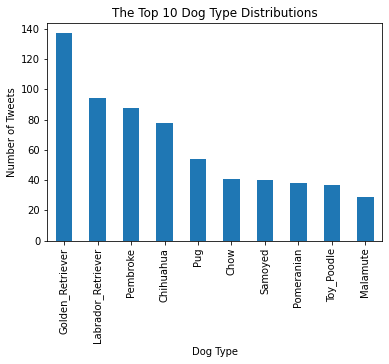

In [58]:
#This plot shows the top 10 dog type distributions 

twitter_image_tweet["p1"].value_counts()[:10].plot(kind='bar')
plt.title("The Top 10 Dog Type Distributions")
plt.xlabel("Dog Type")
plt.ylabel("Number of Tweets")